In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
import matplotlib.font_manager as fm
%matplotlib inline

In [184]:
# colums 인덱스 정의
data_columns = ['스케쥴 id','터미널 코드','Call Year','선박 코드','Call No','접안 일시','출발 일시','선적 작업 수량','양하 작업 수량','Shft 작업 수량','정보 수집 일시']

In [185]:
# CSV파일 불러오기
terminal_schedule_2017=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2017.csv',header=None,encoding='utf-8'))
terminal_schedule_2018=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2018.csv',header=None,encoding='utf-8'))
terminal_schedule_2019=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2019.csv',header=None,encoding='utf-8'))
terminal_schedule_2020=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2020.csv',header=None,encoding='utf-8'))
terminal_schedule_2017.columns=data_columns
terminal_schedule_2018.columns=data_columns
terminal_schedule_2019.columns=data_columns
terminal_schedule_2020.columns=data_columns

A:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
A:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [186]:
# 2017~2020년 데이터 합치기
terminal_schedule = pd.concat([terminal_schedule_2017,terminal_schedule_2018,terminal_schedule_2019,terminal_schedule_2020])
terminal_schedule = terminal_schedule.reset_index()
terminal_schedule.drop('index',axis=1,inplace=True)
print(terminal_schedule)
print(terminal_schedule.dtypes)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No         접안 일시         출발 일시  \
0              1   BNCT       2017  CMPG     004  2.017071e+13  2.017071e+13   
1              2   BNCT       2017  CARC     003  2.017071e+13  2.017071e+13   
2              3   BNCT       2017  IABM     019  2.017071e+13  2.017071e+13   
3              4   BNCT       2017  TXTR     015  2.017071e+13  2.017071e+13   
4              5   BNCT       2017  CXFZ     002  2.017071e+13  2.017071e+13   
...          ...    ...        ...   ...     ...           ...           ...   
1047759  1663231   BPTC       2020  NSTA      30  2.020112e+13  2.020112e+13   
1047760  1663232   BPTC       2020  JPPC      47  2.020112e+13  2.020112e+13   
1047761  1663233   BPTC       2020  NSSK      31  2.020112e+13  2.020112e+13   
1047762  1663234   BPTC       2020  NSSO       6  2.020121e+13  2.020121e+13   
1047763  1663235   BPTC       2020  NSSU      16  2.020121e+13  2.020121e+13   

         선적 작업 수량  양하 작업 수량  Shft 작업 수량

In [187]:
# str과 float로 된 날짜 형식을 datetime으로 바꾸기

# float 형식을 str 형식으로 변환
terminal_schedule[['접안 일시','출발 일시']] = terminal_schedule[['접안 일시','출발 일시']].astype(str)
terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str.slice(start=0,stop=14)
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str.slice(start=0,stop=14)

# str 형식을 datetime 형식으로 바꾸기 위한 전처리
terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str[0:4]+'-'+terminal_schedule['접안 일시'].str[4:6]+'-'+terminal_schedule['접안 일시'].str[6:8] +' '+terminal_schedule['접안 일시'].str[8:10]+':'+terminal_schedule['접안 일시'].str[10:12]+':'+terminal_schedule['접안 일시'].str[12:14]
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str[0:4]+'-'+terminal_schedule['출발 일시'].str[4:6]+'-'+terminal_schedule['출발 일시'].str[6:8] +' '+terminal_schedule['출발 일시'].str[8:10]+':'+terminal_schedule['출발 일시'].str[10:12]+':'+terminal_schedule['출발 일시'].str[12:14]

# 날짜 형식이 안맞는 값 제거
terminal_schedule = terminal_schedule[terminal_schedule['접안 일시'].str.len() == 19]
terminal_schedule = terminal_schedule[terminal_schedule['출발 일시'].str.len() == 19]

# str 형식을 datetime으로 변환
terminal_schedule['접안 일시']=pd.to_datetime(terminal_schedule['접안 일시'])
terminal_schedule['출발 일시']=pd.to_datetime(terminal_schedule['출발 일시'])
terminal_schedule['정보 수집 일시']=pd.to_datetime(terminal_schedule['정보 수집 일시'])
print(terminal_schedule)
print(terminal_schedule.dtypes)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
0              1   BNCT       2017  CMPG     004 2017-07-09 08:48:00   
1              2   BNCT       2017  CARC     003 2017-07-10 02:42:00   
2              3   BNCT       2017  IABM     019 2017-07-10 13:50:00   
3              4   BNCT       2017  TXTR     015 2017-07-10 16:10:00   
4              5   BNCT       2017  CXFZ     002 2017-07-11 06:30:00   
...          ...    ...        ...   ...     ...                 ...   
1047759  1663231   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760  1663232   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761  1663233   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762  1663234   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763  1663235   BPTC       2020  NSSU      16 2020-12-08 06:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량  Shft 작업 수량  \
0       2017-07-10 00:25:00     872.0     958.0        40.0   
1       2

In [188]:
# 1_2 해당 선박의 작업 시간은 얼마나 걸릴지 예상하시오

# 선적 작업 수량과 양하 작업 수량을 바탕으로 추측
# 마지막 정보 수집 일시를 정답이라 가정 

# Shft 작업 수량 행 삭제
terminal_schedule_1_2 = terminal_schedule

terminal_schedule_1_2.drop('Shft 작업 수량',axis=1,inplace=True)
terminal_schedule_1_2.drop('스케쥴 id',axis=1,inplace=True)


print(terminal_schedule_1_2)

        터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
0         BNCT       2017  CMPG     004 2017-07-09 08:48:00   
1         BNCT       2017  CARC     003 2017-07-10 02:42:00   
2         BNCT       2017  IABM     019 2017-07-10 13:50:00   
3         BNCT       2017  TXTR     015 2017-07-10 16:10:00   
4         BNCT       2017  CXFZ     002 2017-07-11 06:30:00   
...        ...        ...   ...     ...                 ...   
1047759   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763   BPTC       2020  NSSU      16 2020-12-08 06:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량            정보 수집 일시  
0       2017-07-10 00:25:00     872.0     958.0                 NaT  
1       2017-07-10 17:50:00     947.0     285.0                 NaT  
2       2017-07-10 21:50:00      

In [189]:
# 결측치 확인
print(terminal_schedule.isnull().sum())

터미널 코드            0
Call Year         0
선박 코드             0
Call No           0
접안 일시             0
출발 일시             0
선적 작업 수량      20435
양하 작업 수량      20435
정보 수집 일시     499561
dtype: int64


In [190]:
# 결측치 제거
terminal_schedule_1_2 = terminal_schedule_1_2.dropna()
print(terminal_schedule_1_2.isnull().sum())
print(terminal_schedule_1_2)

터미널 코드       0
Call Year    0
선박 코드        0
Call No      0
접안 일시        0
출발 일시        0
선적 작업 수량     0
양하 작업 수량     0
정보 수집 일시     0
dtype: int64
        터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
447374     PNC       2018  PROT     001 2019-08-07 11:00:00   
512113    BNCT       2019  CABC     001 2019-03-27 07:00:00   
512114    BNCT       2019  CMEI     001 2019-03-28 01:00:00   
512115    BNCT       2019  AWI4     005 2019-03-28 14:00:00   
512116    BNCT       2019  AKN4     005 2019-04-01 14:00:00   
...        ...        ...   ...     ...                 ...   
1047759   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763   BPTC       2020  NSSU      16 2020-12-08 06:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량            정보 수집 일시  
447374  2019-08-07 22:00:

In [191]:
# 출발 시간의 참값을 알아내기 위해 우선 정보 수집 일시가 출발 일시 이전일 시 데이터 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['출발 일시'] <= terminal_schedule_1_2['정보 수집 일시']].index, inplace=True)
terminal_schedule_1_2

# 작업 수량이 0이나 -인 행 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['선적 작업 수량']<=0].index, inplace=True)
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['양하 작업 수량']<=0].index, inplace=True)
terminal_schedule_1_2



A:\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512113,BNCT,2019,CABC,001,2019-03-27 07:00:00,2019-03-27 23:00:00,1125.0,150.0,2019-03-26 03:47:05
512115,BNCT,2019,AWI4,005,2019-03-28 14:00:00,2019-03-29 07:00:00,1000.0,100.0,2019-03-26 03:47:08
512116,BNCT,2019,AKN4,005,2019-04-01 14:00:00,2019-04-02 08:00:00,100.0,1000.0,2019-03-26 03:47:19
512117,BNCT,2019,CFOS,014,2019-04-02 12:00:00,2019-04-03 04:00:00,100.0,1500.0,2019-03-26 03:47:20
512118,BPTC,2019,KSAC,11,2019-03-26 20:00:00,2019-03-27 08:00:00,300.0,306.0,2019-03-26 03:47:09
...,...,...,...,...,...,...,...,...,...
1047755,BPTC,2020,TLAK,2,2020-11-20 14:00:00,2020-11-21 00:00:00,260.0,60.0,2020-11-19 01:05:22
1047757,BPTC,2020,HHFW,22,2020-11-20 16:00:00,2020-11-21 10:00:00,650.0,422.0,2020-11-19 01:05:22
1047759,BPTC,2020,NSTA,30,2020-11-21 03:00:00,2020-11-21 17:00:00,200.0,350.0,2020-11-19 01:05:22
1047760,BPTC,2020,JPPC,47,2020-11-21 05:00:00,2020-11-21 17:00:00,200.0,250.0,2020-11-19 01:05:22


In [192]:


terminal_schedule_1_2 = terminal_schedule_1_2.sort_values(by=['Call Year', '터미널 코드', '선박 코드','Call No'])
terminal_schedule_1_2
#terminal_schedule_1_3 = terminal_schedule_1_2.sort_values(by=['call Year', '터미널 코드']) 

,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
530186,BIT,2019,A3LV,1,2019-04-19 19:00:00,2019-04-20 16:00:00,600.0,941.0,2019-04-17 00:47:24
530300,BIT,2019,A3LV,1,2019-04-19 19:00:00,2019-04-20 16:00:00,600.0,941.0,2019-04-17 01:47:25
531105,BIT,2019,A3LV,1,2019-04-19 19:00:00,2019-04-20 12:00:00,600.0,941.0,2019-04-18 01:47:24
531261,BIT,2019,A3LV,1,2019-04-19 23:00:00,2019-04-20 16:00:00,600.0,941.0,2019-04-18 04:47:25
531574,BIT,2019,A3LV,1,2019-04-19 23:00:00,2019-04-20 16:00:00,600.0,941.0,2019-04-18 08:47:23
...,...,...,...,...,...,...,...,...,...
927733,SNCT,2020,YLJG,063,2020-08-23 07:00:00,2020-08-23 18:00:00,200.0,150.0,2020-07-29 00:06:03
932315,SNCT,2020,YLJG,063,2020-08-23 19:00:00,2020-08-24 06:00:00,200.0,150.0,2020-08-02 19:46:10
931206,SNCT,2020,YLJG,064,2020-08-26 18:00:00,2020-08-27 07:00:00,200.0,150.0,2020-08-01 00:06:00
932316,SNCT,2020,YLJG,064,2020-08-27 01:00:00,2020-08-27 10:00:00,200.0,150.0,2020-08-02 19:46:10


In [193]:

# 중복 항해 제거 및 최종값(정답) 표출
import copy

#terminal_scheduel_1_3 = terminal_schedule_1_2.copy(deep=True)

terminal_schedule_1_3= terminal_schedule_1_2.drop_duplicates(['터미널 코드','Call Year','선박 코드','Call No'],keep='last',)

#terminal_schedule_1_4 = pd.concat([terminal_schedule_1_2,terminal_schedule_1_3])
terminal_schedule_1_3 = terminal_schedule_1_3.reset_index(drop=True)

terminal_schedule_1_3



,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
0,BIT,2019,A3LV,1,2019-04-20 00:30:00,2019-04-20 22:00:00,552.0,941.0,2019-04-20 09:47:22
1,BIT,2019,ACLA,1,2019-11-10 04:50:00,2019-11-10 17:00:00,287.0,178.0,2019-11-10 03:36:00
2,BIT,2019,AHBY,2,2019-07-12 14:40:00,2019-07-13 17:00:00,456.0,1587.0,2019-07-13 06:17:01
3,BIT,2019,AHBY,3,2019-08-23 03:40:00,2019-08-24 03:00:00,484.0,1006.0,2019-08-23 14:17:00
4,BIT,2019,AHBY,4,2019-11-14 13:00:00,2019-11-15 18:00:00,600.0,1200.0,2019-11-13 00:36:00
...,...,...,...,...,...,...,...,...,...
37203,SNCT,2020,YLJG,061,2020-08-17 08:00:00,2020-08-17 16:00:00,200.0,150.0,2020-08-02 19:46:09
37204,SNCT,2020,YLJG,062,2020-08-20 19:00:00,2020-08-21 04:00:00,200.0,150.0,2020-08-02 19:46:09
37205,SNCT,2020,YLJG,063,2020-08-23 19:00:00,2020-08-24 06:00:00,200.0,150.0,2020-08-02 19:46:10
37206,SNCT,2020,YLJG,064,2020-08-27 01:00:00,2020-08-27 10:00:00,200.0,150.0,2020-08-02 19:46:10


In [194]:
terminal_schedule_1_4 = terminal_schedule_1_2.drop_duplicates(['터미널 코드','Call Year','선박 코드','Call No'],keep='first')
terminal_schedule_1_4 = terminal_schedule_1_4.reset_index(drop=True)
terminal_schedule_1_4


,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
0,BIT,2019,A3LV,1,2019-04-19 19:00:00,2019-04-20 16:00:00,600.0,941.0,2019-04-17 00:47:24
1,BIT,2019,ACLA,1,2019-11-10 14:00:00,2019-11-11 04:00:00,300.0,200.0,2019-11-08 04:36:05
2,BIT,2019,AHBY,2,2019-07-12 15:00:00,2019-07-13 09:00:00,500.0,1000.0,2019-07-10 01:47:06
3,BIT,2019,AHBY,3,2019-08-22 21:00:00,2019-08-23 18:00:00,500.0,1200.0,2019-08-21 01:47:00
4,BIT,2019,AHBY,4,2019-11-14 13:00:00,2019-11-15 06:00:00,600.0,1200.0,2019-11-12 04:36:00
...,...,...,...,...,...,...,...,...,...
37203,SNCT,2020,YLJG,061,2020-08-12 18:00:00,2020-08-13 07:00:00,200.0,150.0,2020-07-18 00:05:51
37204,SNCT,2020,YLJG,062,2020-08-16 07:00:00,2020-08-16 18:00:00,200.0,150.0,2020-07-22 00:05:46
37205,SNCT,2020,YLJG,063,2020-08-23 07:00:00,2020-08-23 18:00:00,200.0,150.0,2020-07-29 00:06:03
37206,SNCT,2020,YLJG,064,2020-08-26 18:00:00,2020-08-27 07:00:00,200.0,150.0,2020-08-01 00:06:00


In [216]:

#terminal_schedule_1_4['도착 시간'] = terminal_schedule_1_3['접안 일시']

#terminal_schedule = terminal_schedule.reset_index()
#terminal_schedule.drop('index',axis=1,inplace=True)
#terminal_schedule_1_5

In [235]:
# 걸린시간 열 추가

terminal_schedule_1_3['처음 정보 수집'] = terminal_schedule_1_4['정보 수집 일시']
terminal_schedule_1_3['소요 시간'] = terminal_schedule_1_3['접안 일시'] - terminal_schedule_1_4['정보 수집 일시']


terminal_schedule_1_3


,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시,처음 정보 수집,소요 시간,소요 시간 to 초
0,BIT,2019,A3LV,1,2019-04-20 00:30:00,2019-04-20 22:00:00,552.0,941.0,2019-04-20 09:47:22,2019-04-17 00:47:24,2 days 23:42:36,258156
1,BIT,2019,ACLA,1,2019-11-10 04:50:00,2019-11-10 17:00:00,287.0,178.0,2019-11-10 03:36:00,2019-11-08 04:36:05,2 days 00:13:55,173635
2,BIT,2019,AHBY,2,2019-07-12 14:40:00,2019-07-13 17:00:00,456.0,1587.0,2019-07-13 06:17:01,2019-07-10 01:47:06,2 days 12:52:54,219174
3,BIT,2019,AHBY,3,2019-08-23 03:40:00,2019-08-24 03:00:00,484.0,1006.0,2019-08-23 14:17:00,2019-08-21 01:47:00,2 days 01:53:00,179580
4,BIT,2019,AHBY,4,2019-11-14 13:00:00,2019-11-15 18:00:00,600.0,1200.0,2019-11-13 00:36:00,2019-11-12 04:36:00,2 days 08:24:00,203040
...,...,...,...,...,...,...,...,...,...,...,...,...
37203,SNCT,2020,YLJG,061,2020-08-17 08:00:00,2020-08-17 16:00:00,200.0,150.0,2020-08-02 19:46:09,2020-07-18 00:05:51,30 days 07:54:09,2620449
37204,SNCT,2020,YLJG,062,2020-08-20 19:00:00,2020-08-21 04:00:00,200.0,150.0,2020-08-02 19:46:09,2020-07-22 00:05:46,29 days 18:54:14,2573654
37205,SNCT,2020,YLJG,063,2020-08-23 19:00:00,2020-08-24 06:00:00,200.0,150.0,2020-08-02 19:46:10,2020-07-29 00:06:03,25 days 18:53:57,2228037
37206,SNCT,2020,YLJG,064,2020-08-27 01:00:00,2020-08-27 10:00:00,200.0,150.0,2020-08-02 19:46:10,2020-08-01 00:06:00,26 days 00:54:00,2249640


In [240]:
terminal_schedule_1_3.drop('선적 작업 수량',axis=1,inplace=True)
terminal_schedule_1_3.drop('양하 작업 수량',axis=1,inplace=True)
terminal_schedule_1_3.drop('출발 일시',axis=1,inplace=True)
terminal_schedule_1_3

,터미널 코드,Call Year,선박 코드,Call No,접안 일시,정보 수집 일시,처음 정보 수집,소요 시간,소요 시간 to 초
0,BIT,2019,A3LV,1,2019-04-20 00:30:00,2019-04-20 09:47:22,2019-04-17 00:47:24,2 days 23:42:36,258156
1,BIT,2019,ACLA,1,2019-11-10 04:50:00,2019-11-10 03:36:00,2019-11-08 04:36:05,2 days 00:13:55,173635
2,BIT,2019,AHBY,2,2019-07-12 14:40:00,2019-07-13 06:17:01,2019-07-10 01:47:06,2 days 12:52:54,219174
3,BIT,2019,AHBY,3,2019-08-23 03:40:00,2019-08-23 14:17:00,2019-08-21 01:47:00,2 days 01:53:00,179580
4,BIT,2019,AHBY,4,2019-11-14 13:00:00,2019-11-13 00:36:00,2019-11-12 04:36:00,2 days 08:24:00,203040
...,...,...,...,...,...,...,...,...,...
37203,SNCT,2020,YLJG,061,2020-08-17 08:00:00,2020-08-02 19:46:09,2020-07-18 00:05:51,30 days 07:54:09,2620449
37204,SNCT,2020,YLJG,062,2020-08-20 19:00:00,2020-08-02 19:46:09,2020-07-22 00:05:46,29 days 18:54:14,2573654
37205,SNCT,2020,YLJG,063,2020-08-23 19:00:00,2020-08-02 19:46:10,2020-07-29 00:06:03,25 days 18:53:57,2228037
37206,SNCT,2020,YLJG,064,2020-08-27 01:00:00,2020-08-02 19:46:10,2020-08-01 00:06:00,26 days 00:54:00,2249640


In [228]:
def convert(x):
    return x.seconds+x.days*(24*60*60)
def conver2t(x):
    return pd.Timedelta(x,unit='sec')


In [230]:
# terminal_schedule_1_3.groupby(['터미널 코드','Call Year', '선박 코드'],as_index=False)['정보 수집 일시2'].mean()
terminal_schedule_1_3['소요 시간 to 초'] = terminal_schedule_1_3['소요 시간'].apply(lambda x:convert(x))

terminal_schedule_1_5 = terminal_schedule_1_3.groupby(by=['터미널 코드','Call Year', '선박 코드'], as_index=False)['소요 시간 to 초'].mean()

terminal_schedule_1_5['초 to 소요 시간'] = terminal_schedule_1_5['소요 시간 to 초'].apply(lambda x:conver2t(x))
#pd.to_datetime(['소요 시간']) 
terminal_schedule_1_6 = terminal_schedule_1_4.drop_duplicates(['터미널 코드','Call Year','선박 코드'],keep='first')
terminal_schedule_1_6 = terminal_schedule_1_6.reset_index(drop=True)


terminal_schedule_1_5['정보 수집 일시'] = terminal_schedule_1_6['정보 수집 일시']
terminal_schedule_1_5['최종'] = terminal_schedule_1_5['초 to 소요 시간'] + terminal_schedule_1_5['정보 수집 일시']

terminal_schedule_1_5

,터미널 코드,Call Year,선박 코드,소요 시간 to 초,초 to 소요 시간,정보 수집 일시,최종
0,BIT,2019,A3LV,2.581560e+05,2 days 23:42:36,2019-04-17 00:47:24,2019-04-20 00:30:00.000000000
1,BIT,2019,ACLA,1.736350e+05,2 days 00:13:55,2019-11-08 04:36:05,2019-11-10 04:50:00.000000000
2,BIT,2019,AHBY,1.740578e+05,2 days 00:20:57.750000,2019-07-10 01:47:06,2019-07-12 02:08:03.750000000
3,BIT,2019,ANCH,3.961800e+05,4 days 14:03:00,2019-08-16 06:47:00,2019-08-20 20:50:00.000000000
4,BIT,2019,BEIH,1.988058e+05,2 days 07:13:25.833333,2019-08-19 06:47:00,2019-08-21 14:00:25.833333333
...,...,...,...,...,...,...,...
5527,SNCT,2020,WCUB,2.244488e+06,25 days 23:28:08,2019-12-15 00:06:24,2020-01-09 23:34:32.000000000
5528,SNCT,2020,XIMZ,2.009213e+06,23 days 06:06:52.519230,2020-08-13 00:05:49,2020-09-05 06:12:41.519230769
5529,SNCT,2020,XISN,1.960194e+06,22 days 16:29:54.428571,2020-04-02 08:46:04,2020-04-25 01:15:58.428571429
5530,SNCT,2020,XZ26,1.136282e+06,13 days 03:38:02,2020-03-17 05:33:58,2020-03-30 09:12:00.000000000


In [231]:
from sklearn import linear_model
import numpy as np
import matplotlib
import statsmodels.api as sm
import seaborn as sns
matplotlib.style.use('ggplot')

In [232]:
!pip install statsmodels

In [495]:
data = terminal_schedule_1_2[['선박 코드','정보 수립 일시','최종']]
print(data)
X = data[['터미널 코드','선박코드','정보 수립 일지']]
y = data['최종'].dt.seconds + data['최종'].dt.days*86400
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y= y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

KeyError: "['정보 수립 일지'] not in index"

In [ ]:
residuals = y-prediction
residuals.describe()

In [299]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7488666957735051


In [300]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7488666957735051
Mean_Squared_Error =  468650355.6197873
RMSE =  21648.333783914808


In [301]:
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
print(data)
X = data[['선적 작업 수량','양하 작업 수량']]
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

         선적 작업 수량  양하 작업 수량        작업 소요 시간
512594      359.0     346.0 0 days 15:48:00
512827      128.0     181.0 0 days 09:09:00
513175      588.0    1089.0 0 days 19:45:00
513200      586.0    1087.0 0 days 19:45:00
513228      401.0     529.0 0 days 12:00:00
...           ...       ...             ...
1045323     984.0    1581.0 1 days 03:00:00
1045612      34.0      48.0 0 days 05:00:00
1045693     101.0     352.0 0 days 15:00:00
1045907     481.0     480.0 0 days 18:00:00
1046324     140.0     151.0 3 days 16:00:00

[2032 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:               작업 소요 시간   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     3025.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:33:38   Log-Likeliho

In [304]:
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
print(data)
X = data[['선적 작업 수량','양하 작업 수량']]
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

         선적 작업 수량  양하 작업 수량        작업 소요 시간
512594      359.0     346.0 0 days 15:48:00
512827      128.0     181.0 0 days 09:09:00
513175      588.0    1089.0 0 days 19:45:00
513200      586.0    1087.0 0 days 19:45:00
513228      401.0     529.0 0 days 12:00:00
...           ...       ...             ...
1045323     984.0    1581.0 1 days 03:00:00
1045612      34.0      48.0 0 days 05:00:00
1045693     101.0     352.0 0 days 15:00:00
1045907     481.0     480.0 0 days 18:00:00
1046324     140.0     151.0 3 days 16:00:00

[2032 rows x 3 columns]
a value =  24935.846278715486
b value =  [29.87752546 26.91692438]


512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1045323    2565.0
1045612      82.0
1045693     453.0
1045907     961.0
1046324     291.0
Length: 2032, dtype: float64
512594      56880
512827      32940
513175      71100
513200      71100
513228      43200
            ...  
1045323     97200
1045612     18000
1045693     54000
1045907     64800
1046324    316800
Name: 작업 소요 시간, Length: 2032, dtype: int64


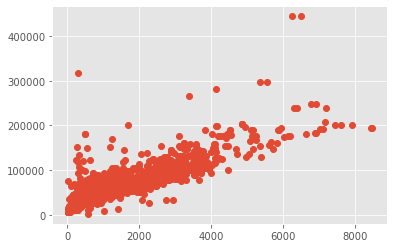

In [303]:
data_2 = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [ ]:
terminal_schedule_1_2 = terminal_schedule_1_2[terminal_schedule_1_2['선적 작업 수량']  terminal_schedule_1_2['양하 작업 수량']]